In [ ]:
import pandas as pd

df = pd.read_csv("shipment_data.csv.csv")  # pastikan nama file sesuai

# Cek kolom
print(df.columns.tolist())

['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


**EDA UNIVARIATE**


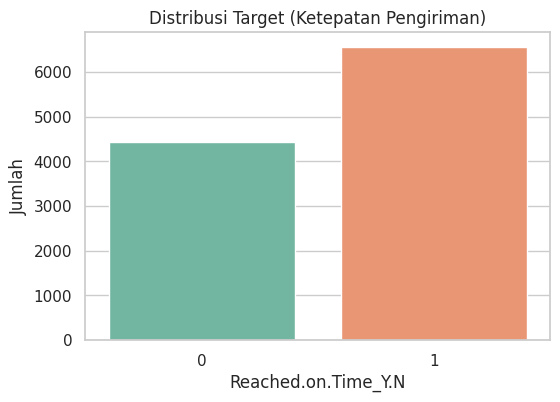

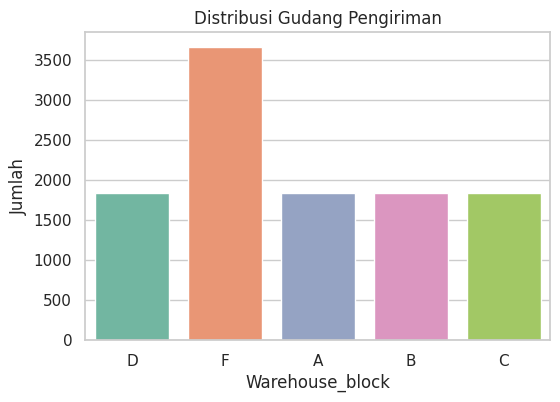

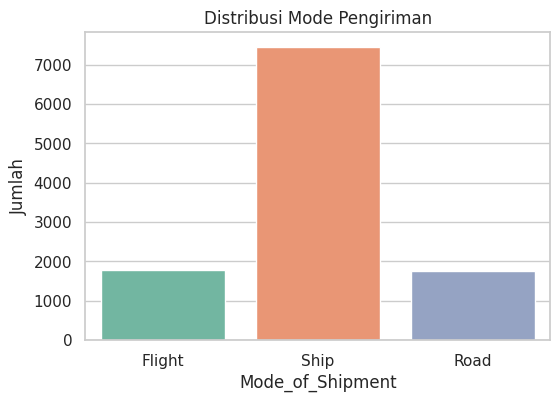

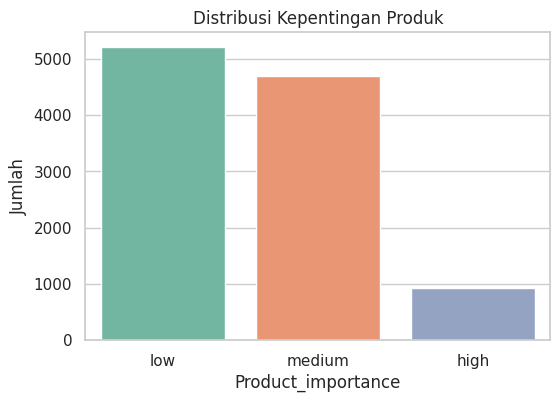

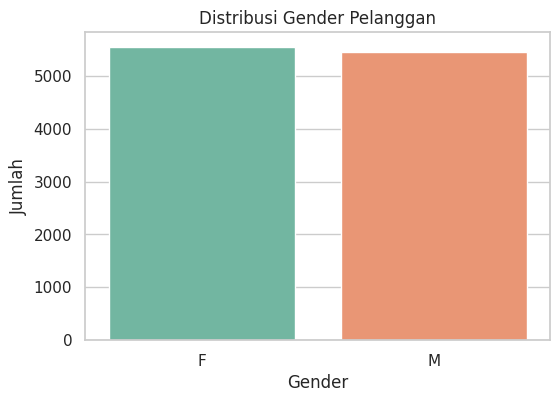

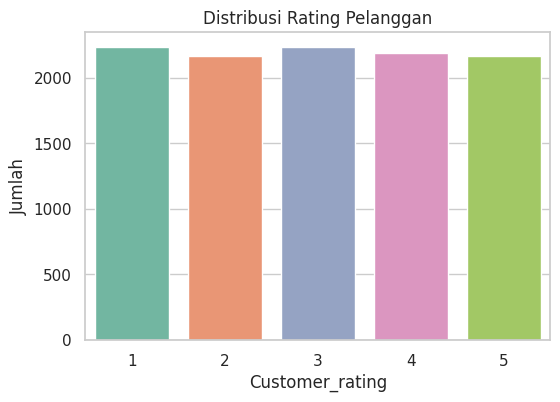

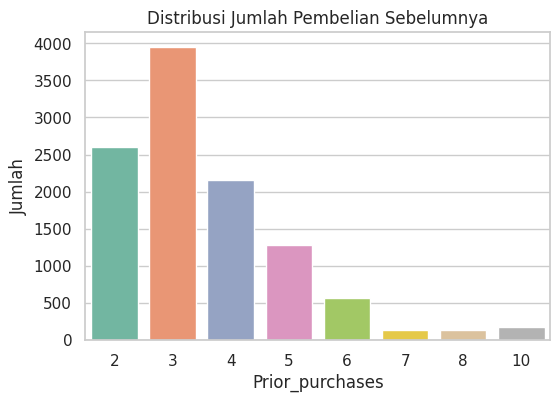

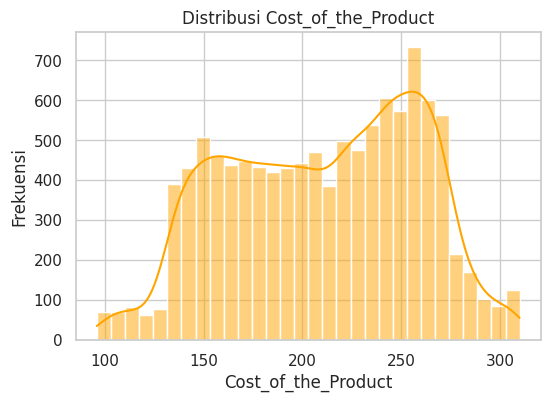

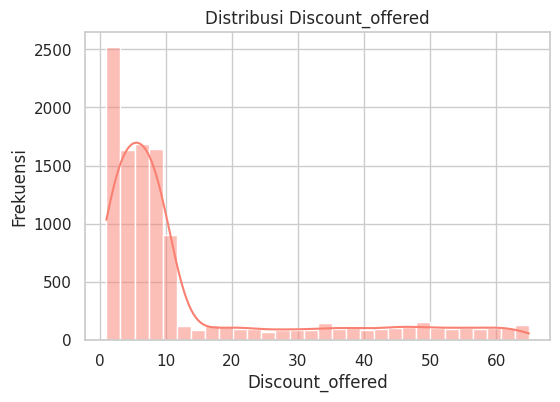

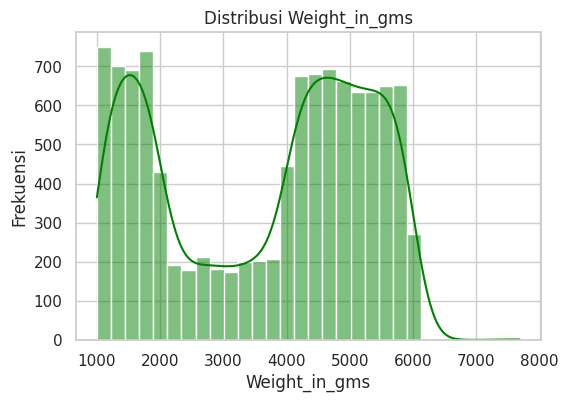

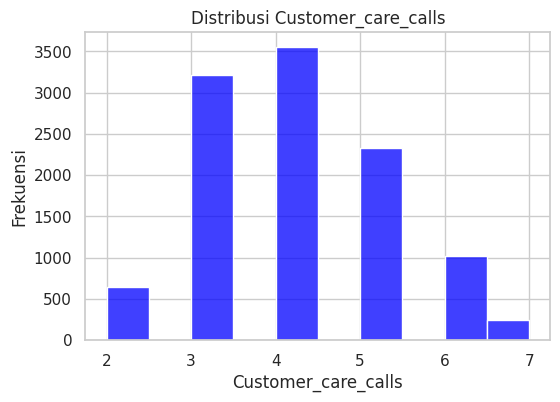

In [ ]:
# Set style visual
sns.set(style="whitegrid")

# Fungsi bantu visualisasi kategorikal
def plot_count(column, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, hue=column, data=df, palette='Set2', legend=False)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Jumlah")
    plt.show()

# Fungsi bantu visualisasi numerik
def plot_hist(column, bins=30, kde=True, color='skyblue'):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=bins, kde=kde, color=color)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.show()

# Target Variable
plot_count('Reached.on.Time_Y.N', 'Distribusi Target (Ketepatan Pengiriman)')

# Variabel Kategorikal
plot_count('Warehouse_block', 'Distribusi Gudang Pengiriman')
plot_count('Mode_of_Shipment', 'Distribusi Mode Pengiriman')
plot_count('Product_importance', 'Distribusi Kepentingan Produk')
plot_count('Gender', 'Distribusi Gender Pelanggan')
plot_count('Customer_rating', 'Distribusi Rating Pelanggan')
plot_count('Prior_purchases', 'Distribusi Jumlah Pembelian Sebelumnya')

# Variabel Numerik
plot_hist('Cost_of_the_Product', color='orange')
plot_hist('Discount_offered', color='salmon')
plot_hist('Weight_in_gms', color='green')
plot_hist('Customer_care_calls', bins=10, kde=False, color='blue')


2**. EDA Bivariate — Analisis Dua Variabel (Hubungan dengan Target)**

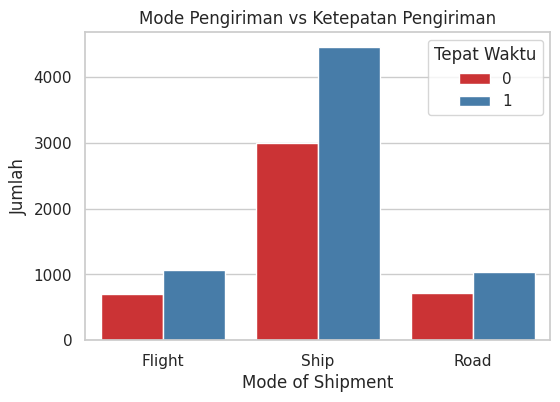

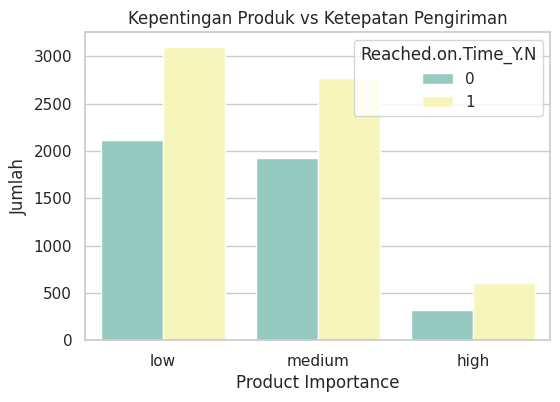

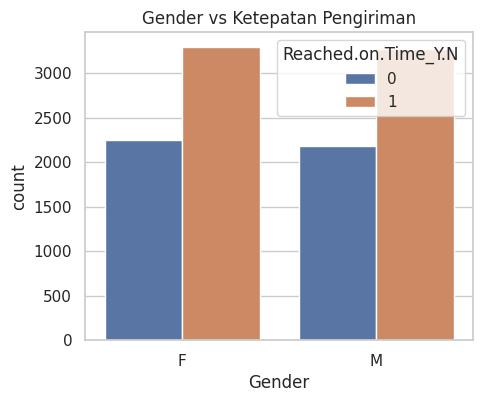

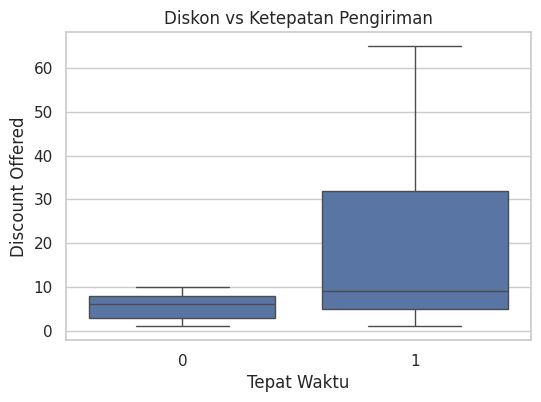

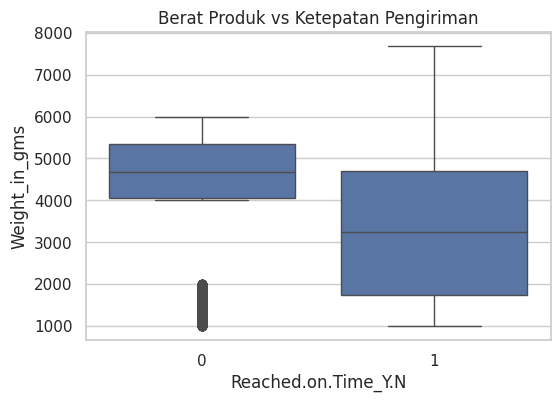

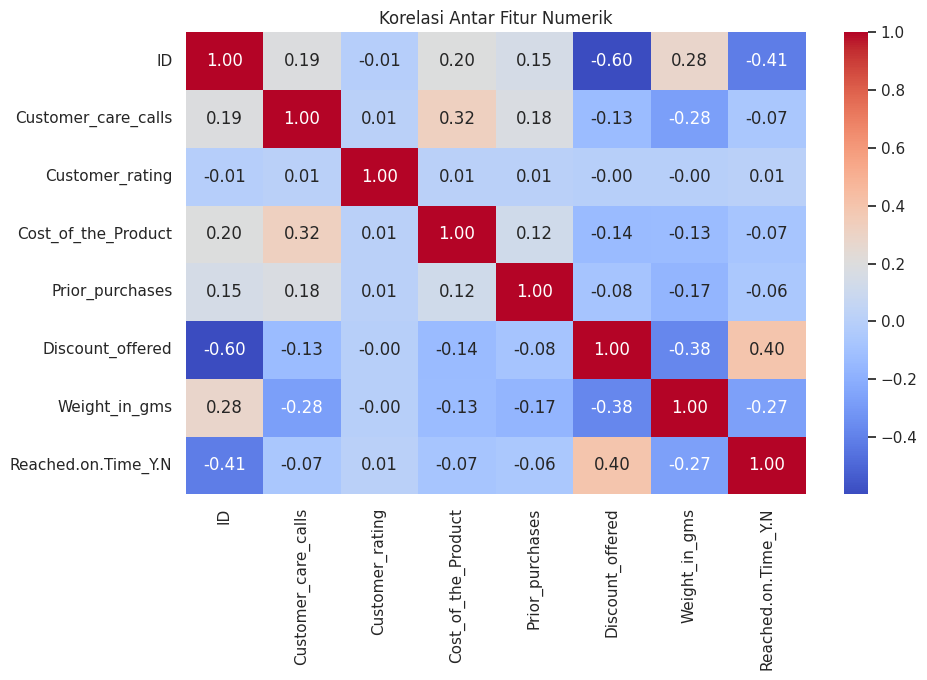

In [ ]:
# Mode of Shipment vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, palette='Set1')
plt.title('Mode Pengiriman vs Ketepatan Pengiriman')
plt.xlabel('Mode of Shipment')
plt.ylabel('Jumlah')
plt.legend(title='Tepat Waktu')
plt.show()

# Product Importance vs Target
plt.figure(figsize=(6, 4))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df, palette='Set3')
plt.title('Kepentingan Produk vs Ketepatan Pengiriman')
plt.xlabel('Product Importance')
plt.ylabel('Jumlah')
plt.show()

# Gender vs Target
plt.figure(figsize=(5, 4))
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=df)
plt.title('Gender vs Ketepatan Pengiriman')
plt.show()

# Discount vs Target (boxplot) - hapus palette karena tanpa hue
plt.figure(figsize=(6, 4))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df)
plt.title('Diskon vs Ketepatan Pengiriman')
plt.xlabel('Tepat Waktu')
plt.ylabel('Discount Offered')
plt.show()

# Berat Produk vs Target (boxplot) - hapus palette karena tanpa hue
plt.figure(figsize=(6, 4))
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=df)
plt.title('Berat Produk vs Ketepatan Pengiriman')
plt.show()

# Korelasi Numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()



**EDA MULTIVARIATE**

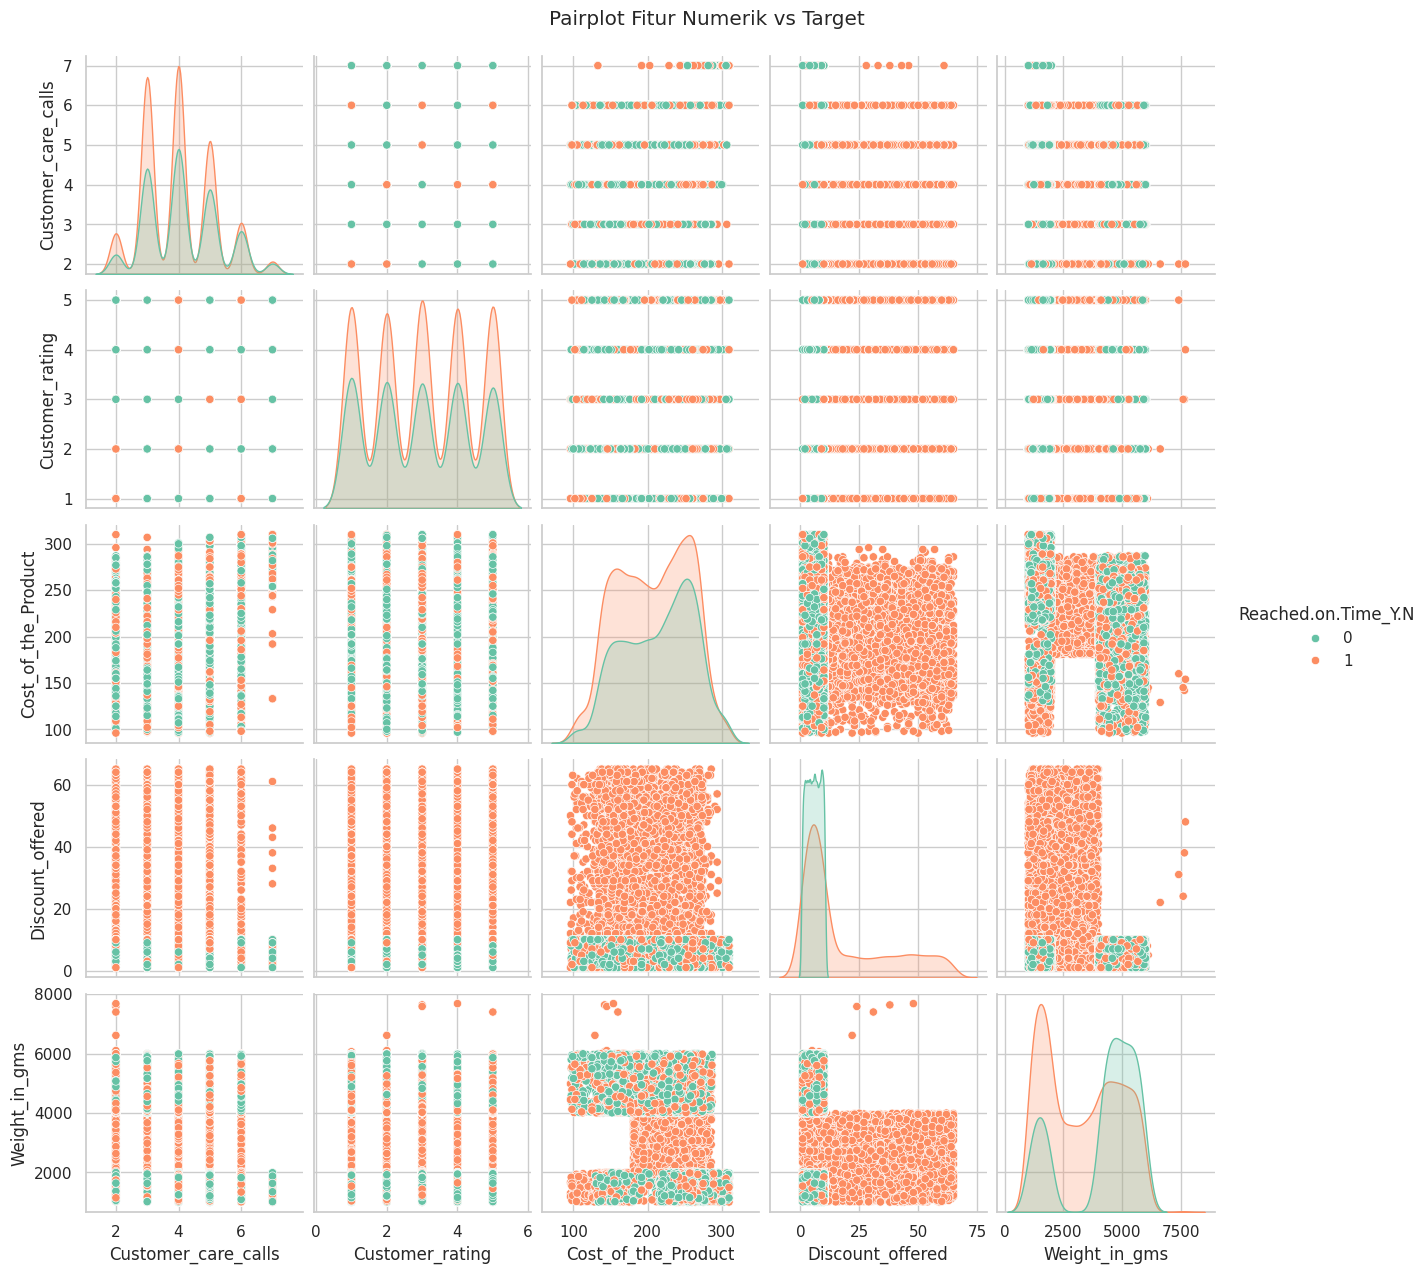

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil subset fitur numerik + target
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
subset = df[numerical_cols + ['Reached.on.Time_Y.N']]

# Pairplot
sns.pairplot(subset, hue='Reached.on.Time_Y.N', palette='Set2')
plt.suptitle("Pairplot Fitur Numerik vs Target", y=1.02)
plt.show()

### **DATA PREPROCESSING**

**OUTLIER HANDLING**

In [ ]:
# Tangani outlier dengan metode IQR (contoh pada Weight_in_gms)
Q1 = df['Weight_in_gms'].quantile(0.25)
Q3 = df['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
df = df[(df['Weight_in_gms'] >= lower_bound) & (df['Weight_in_gms'] <= upper_bound)]

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print(df.columns.tolist())

['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


**Outlier Handling**
(numerical data)

In [ ]:
import pandas as pd
#Baca data
df = pd.read_csv('shipment_data.csv.csv')
#Kolom numerik
numerical_cols = ['Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
#Deteksi outlier & tandai
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


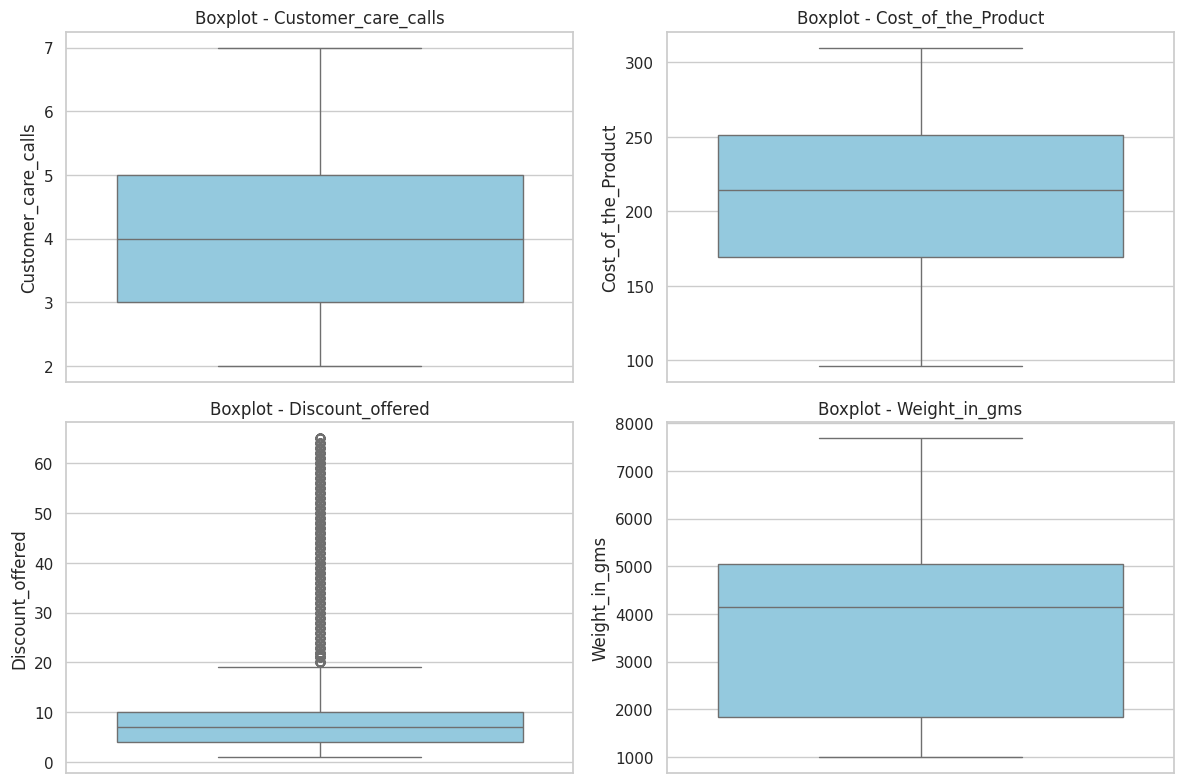

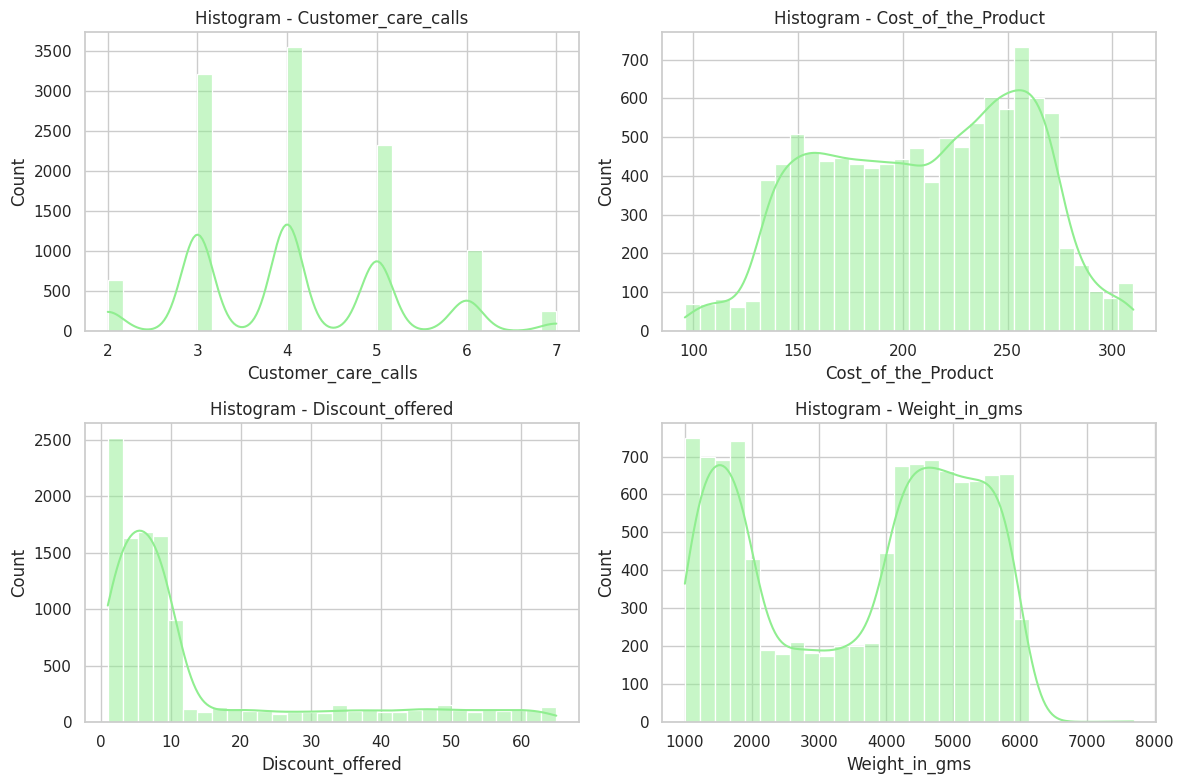

In [ ]:

# Daftar kolom numerik
numerical_cols = ['Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

# Validasi kolom
missing_cols = [col for col in numerical_cols if col not in df.columns]
if missing_cols:
    print(f"Kolom berikut tidak ditemukan dalam DataFrame: {missing_cols}")
else:
    # Visualisasi Boxplot
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Boxplot - {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # 📊 Visualisasi Histogram
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], bins=30, kde=True, color='lightgreen')
        plt.title(f'Histogram - {col}')
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()


**NORMALIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Kolom numerik yang ingin dinormalisasi
num_cols = ['Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Daftar kolom numerik yang akan dinormalisasi
numerical_cols = ['Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

# Konversi ke float agar tidak error saat normalisasi
df[numerical_cols] = df[numerical_cols].astype(float)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan normalisasi (fit dan transform)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan hasil normalisasi
print("✅ Data numerik berhasil dinormalisasi:")
print(df[numerical_cols].head())

✅ Data numerik berhasil dinormalisasi:
   Customer_care_calls  Cost_of_the_Product  Discount_offered  Weight_in_gms
0            -0.047711            -0.690666          1.889983      -1.473188
1            -0.047711             0.120796          2.815636      -0.338634
2            -1.799887            -0.565826          2.136824      -0.163710
3            -0.923799            -0.711473         -0.208162      -1.507438
4            -1.799887            -0.545019          2.013404      -0.708052


**IMBLANCE DATA HANDLING (SMOTE)**

In [ ]:
from sklearn.model_selection import train_test_split

# Misal X dan y sudah ada, misal dari datasetmu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

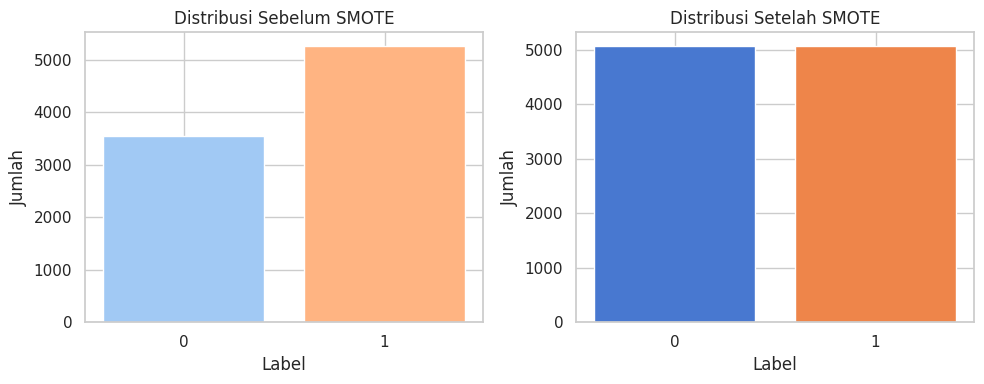

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsi y_train dan y_train_resampled sudah terdefinisi sebagai pandas Series atau array

# Buat dua Series: sebelum & sesudah SMOTE
before_smote = y_train.value_counts().sort_index()
after_smote = pd.Series(y_train_resampled).value_counts().sort_index()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].bar(before_smote.index.astype(str), before_smote.values, color=sns.color_palette('pastel'))
axs[0].set_title("Distribusi Sebelum SMOTE")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Jumlah")
axs[1].bar(after_smote.index.astype(str), after_smote.values, color=sns.color_palette('muted'))
axs[1].set_title("Distribusi Setelah SMOTE")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Jumlah")
plt.tight_layout()
plt.show()


# **MODELING**

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       878
           1       0.84      0.52      0.64      1245

    accuracy                           0.66      2123
   macro avg       0.70      0.69      0.66      2123
weighted avg       0.72      0.66      0.65      2123

🎯 Accuracy: 65.80%


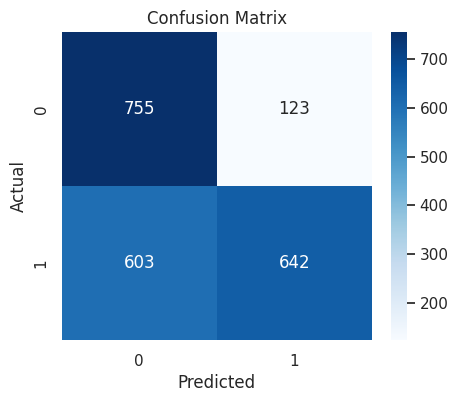

In [ ]:
# ✅ 1. Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 2. Load data
df = pd.read_csv('shipment_data.csv.csv')
df.columns = df.columns.str.strip()  # Bersihkan spasi kolom

# ✅ 3. Drop missing values
df = df.dropna()

# ✅ 4. Hapus kolom kategorikal asli (sudah one-hot encoded)
df = df.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1, errors='ignore')

# ✅ 5. Tangani outlier (contoh: Weight_in_gms)
Q1 = df['Weight_in_gms'].quantile(0.25)
Q3 = df['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Weight_in_gms'] >= lower) & (df['Weight_in_gms'] <= upper)]

# ✅ 6. Normalisasi fitur numerik
num_cols = ['Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
df[num_cols] = df[num_cols].astype(float)
scaler = StandardScaler()
df.loc[:, num_cols] = scaler.fit_transform(df[num_cols])

# ✅ 7. Split fitur dan target
X = df.drop(['Reached.on.Time_Y.N', 'ID'], axis=1)
y = df['Reached.on.Time_Y.N']
X.columns = X.columns.astype(str)

# ✅ 8. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 9. Tangani imbalance dengan SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# ✅ 10. Modeling - Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

# ✅ 11. Evaluasi hasil
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("🎯 Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# ✅ 12. Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**BEST MODEL**


📌 Logistic Regression
Accuracy: 0.6580
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       878
           1       0.84      0.52      0.64      1245

    accuracy                           0.66      2123
   macro avg       0.70      0.69      0.66      2123
weighted avg       0.72      0.66      0.65      2123


📌 Decision Tree
Accuracy: 0.6425
              precision    recall  f1-score   support

           0       0.57      0.58      0.57       878
           1       0.70      0.68      0.69      1245

    accuracy                           0.64      2123
   macro avg       0.63      0.63      0.63      2123
weighted avg       0.64      0.64      0.64      2123


📌 Random Forest
Accuracy: 0.6594
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       878
           1       0.77      0.60      0.67      1245

    accuracy                           0.66      2123
   macro avg       0

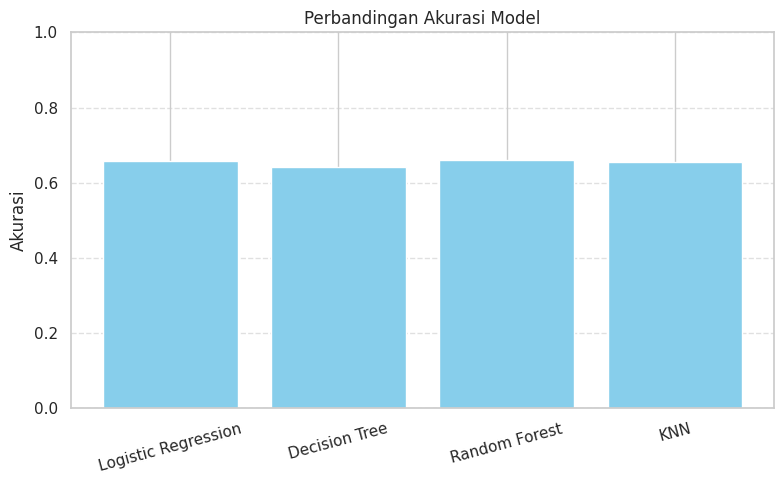

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Daftar model yang akan diuji
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Simpan hasil evaluasi
results = {}

# Loop dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📌 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

# Tampilkan model dengan akurasi terbaik
best_model_name = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()